## Sentiment Anylisis Model Gift Cards
### COMP262 - Group 5
Juan Arevalo  
Jose Muniz  
Ruben Ormeno  
Samantha Ortiz de Foronda  
Mariela Ramos Vila


## 1. Dataset data exploration

In [1]:
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from sklearn.metrics import f1_score
from nltk.corpus import stopwords
import spacy

C:\Users\maric\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Load data
df = pd.read_json(r"C:\MR\Centennial\Sem4\NLP\Project\Gift_Cards_5.json\Gift_Cards_5.json",lines = True)

#### Field Description
overall (bigint) – User rating (1-5)  
verified (boolean)  Is the review verified (true, false)  
reviewtime (string) – Timestamp formatted like “10 30, 2009”  
reviewerid (string) – Amazon generated user id  
asin (string) – Unique Amazon generated product id  
reviewername (string) – User supplied name  
reviewtext (string) – Review text  
summary (string) – Summary of Review text  
unixreviewtime (bigint) – Timestamp formatted in epoch time  
vote (double) – Userful voters form other users  
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"  
image -  images that users post after they have received the product  

### 1a. Counts, averages

In [3]:
# Base exploration
print('\n---Name and Types of colums---\n')
print(df.info())
print('\n---Shape----\n')
print(df.shape)



---Name and Types of colums---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         2972 non-null   int64  
 1   verified        2972 non-null   bool   
 2   reviewTime      2972 non-null   object 
 3   reviewerID      2972 non-null   object 
 4   asin            2972 non-null   object 
 5   style           864 non-null    object 
 6   reviewerName    2972 non-null   object 
 7   reviewText      2966 non-null   object 
 8   summary         2972 non-null   object 
 9   unixReviewTime  2972 non-null   int64  
 10  vote            208 non-null    float64
 11  image           12 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 258.4+ KB
None

---Shape----

(2972, 12)


In [4]:
# classes by variable
def check_columns(dataframe):
    total_counts = []
    unique_counts = []
    missing_values = []
    for column in dataframe.columns:
        try:
            # Attempt to count unique values in the usual way
            total_count = dataframe[column].count()
            unique_count = dataframe[column].nunique()
            missing_value = dataframe[column].isna().sum()
            
        except TypeError:
            # Handle unhashable items by converting them to strings (or another approach as needed)
            total_count = dataframe[column].astype(str).count()
            unique_count = dataframe[column].astype(str).nunique()
            missing_value = dataframe[column].astype(str).isna().sum() 
                
        total_counts.append(total_count)
        unique_counts.append(unique_count)
        missing_values.append(missing_value)

    # Create DataFrame with counts
    nunique_df = pd.DataFrame({'Column': dataframe.columns, 'Total counts': total_counts,'Unique Value': unique_counts, 'Missing values': missing_values})
    nunique_df = nunique_df.sort_values('Unique Value', ascending=False).reset_index(drop=True)
    return nunique_df
check_columns(df)

,Column,Total counts,Unique Value,Missing values
0,reviewText,2966,1937,6
1,summary,2972,952,0
2,reviewTime,2972,797,0
3,unixReviewTime,2972,797,0
4,reviewerID,2972,458,0
5,reviewerName,2972,429,0
6,asin,2972,148,0
7,vote,208,20,2764
8,style,2972,18,0
9,image,2972,13,0



Counts and Averages of Numerical Variables:
           overall  unixReviewTime        vote
count  2972.000000    2.972000e+03  208.000000
mean      4.885262    1.476136e+09    5.158654
std       0.484660    3.379616e+07    7.366121
min       1.000000    1.327968e+09    2.000000
25%       5.000000    1.454890e+09    2.000000
50%       5.000000    1.482710e+09    3.000000
75%       5.000000    1.500271e+09    5.000000
max       5.000000    1.534896e+09   60.000000


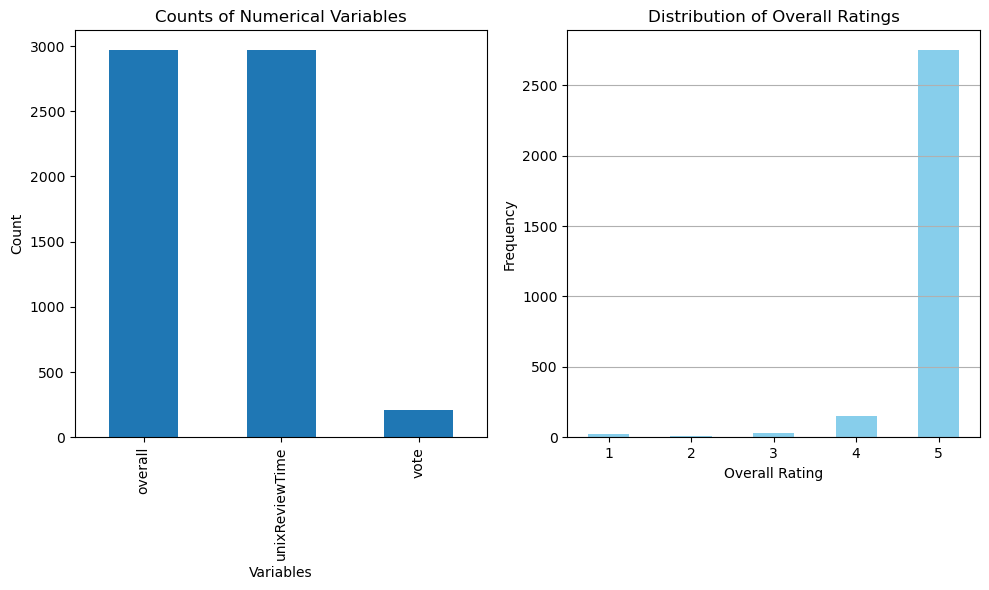

In [5]:

# Select numerical variables
numerical_variables = df.select_dtypes(include=['int64', 'float64'])

# Print summary statistics
print("\nCounts and Averages of Numerical Variables:")
print(numerical_variables.describe())

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for counts
plt.subplot(1, 2, 1)
numerical_variables.count().plot(kind='bar')
plt.title('Counts of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Count')

# Line plot for averages
plt.subplot(1, 2, 2)
numerical_variables['overall'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  

plt.tight_layout()
plt.show()


### 1b. Distribution of number of reviews across products

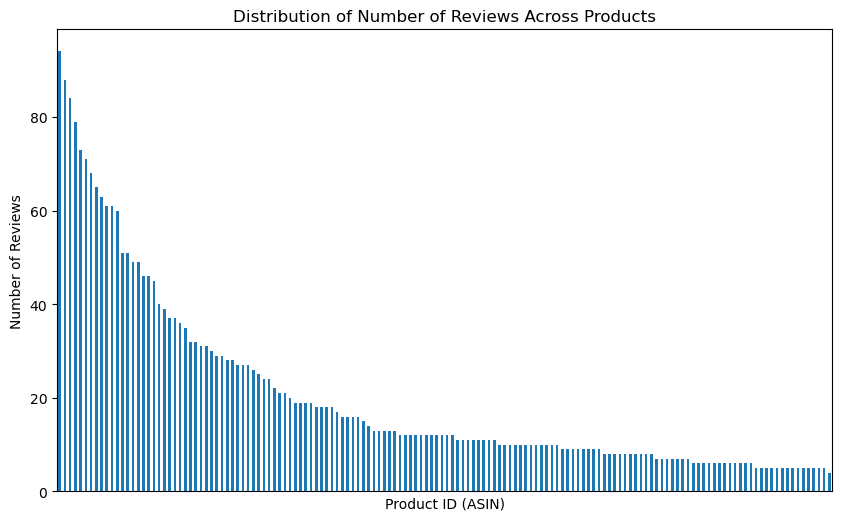

In [6]:
# Calculate the number of reviews per product (ASIN)
review_counts = df['asin'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))
review_counts.plot(kind='bar')
plt.title('Distribution of Number of Reviews Across Products')
plt.xlabel('Product ID (ASIN)')
plt.ylabel('Number of Reviews')
plt.xticks([])  # Rotate the x-axis labels for better readability
plt.show()

### 1c. Distribution of number of reviews per products

C:\Users\maric\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


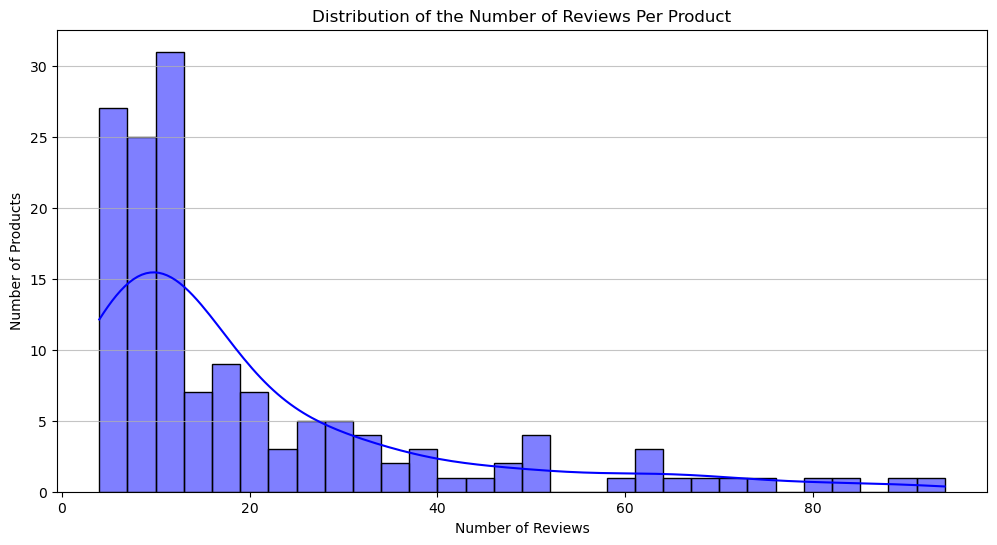

In [7]:

reviews_per_product = df['asin'].value_counts()

# plot using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(reviews_per_product, bins=30, kde=True, color='blue')
plt.title('Distribution of the Number of Reviews Per Product')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.grid(axis='y', alpha=0.75)

plt.show()


In [8]:
# Assuming 'df' is your DataFrame containing the dataset information

# Calculate the top 10 products with the most reviews and their counts
top_10_most_reviews = df['asin'].value_counts().head(10)

# Calculate the top 10 products with the least reviews and their counts
top_10_least_reviews = df['asin'].value_counts().tail(10)

print("Top 10 products with the most reviews:")
print(top_10_most_reviews)

print("\nTop 10 products with the least reviews:")
print(top_10_least_reviews)


Top 10 products with the most reviews:
asin
B00AR51Y5I    94
B004Q7CK9M    88
B0091JKVU0    84
B00BXLW5QC    79
B0091JKY0M    73
B01E4QUN0W    71
B00GOLGWVK    68
B00CHQ7I2S    65
B006PJHP62    63
B00PG8502O    61
Name: count, dtype: int64

Top 10 products with the least reviews:
asin
B00ET5WASC    5
B00BXLVD8I    5
B014S2HRVK    5
B015NKJ6D8    5
B00ELQD5K6    5
B016J1LGPG    5
B01CT5PHJ2    5
B00BXLSPGQ    5
B0188LOK7G    5
B01B25LU7S    4
Name: count, dtype: int64


### 1d. Distribution reviews per user

C:\Users\maric\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


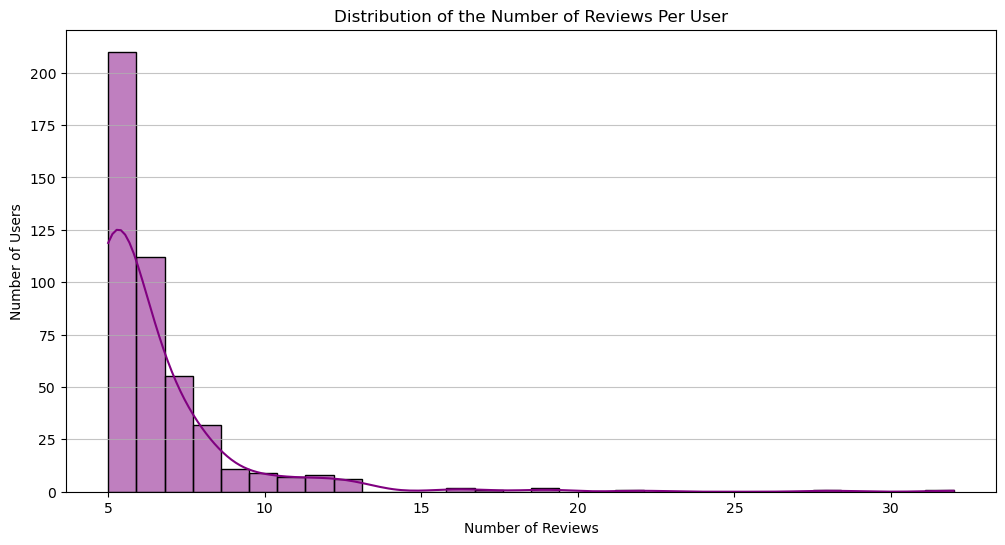

In [9]:
# Calculate the number of reviews per user
reviews_per_user = df['reviewerID'].value_counts()

# Plot the distribution of the number of reviews per user using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(reviews_per_user, bins=30, kde=True, color='purple')
plt.title('Distribution of the Number of Reviews Per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)

plt.show()

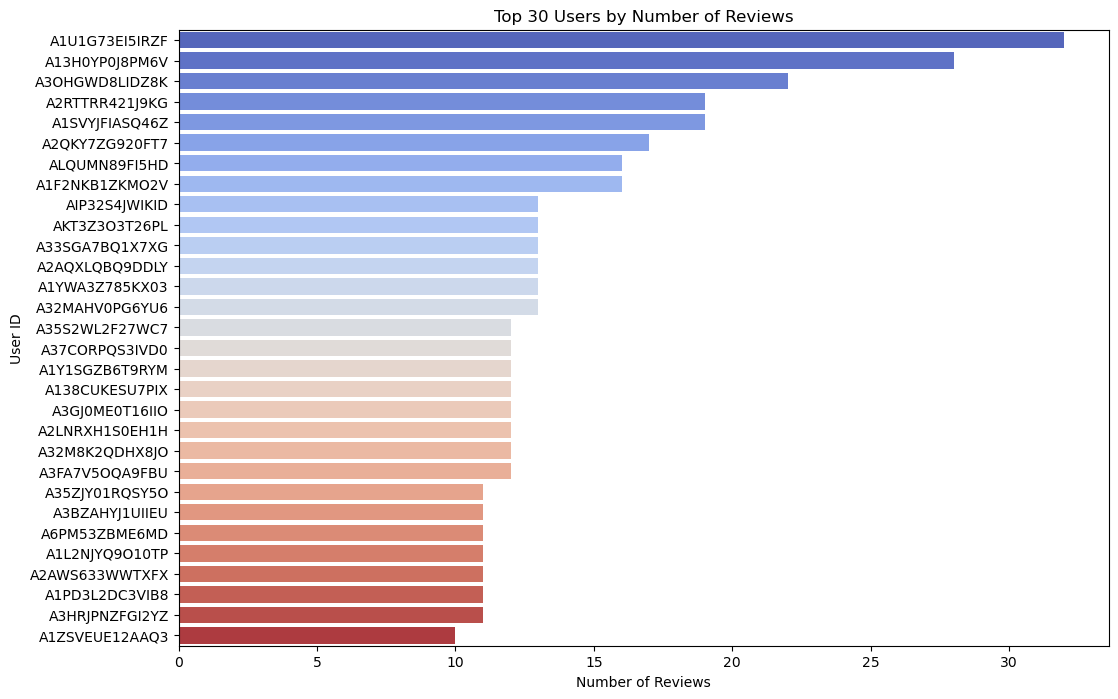

In [10]:
# Top 30 users with the most reviews and their counts
top_30_users_reviews = df['reviewerID'].value_counts().head(30)

# Plotting the distribution of reviews for the top 30 users
plt.figure(figsize=(12, 8))
sns.barplot(y=top_30_users_reviews.index, x=top_30_users_reviews.values, palette='coolwarm')
plt.title('Top 30 Users by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')

plt.show()

### 1e.	Review lengths

In [11]:
# Calculate review lengths
df_length = df['reviewText'].dropna().apply(lambda x: len(str(x).split()))

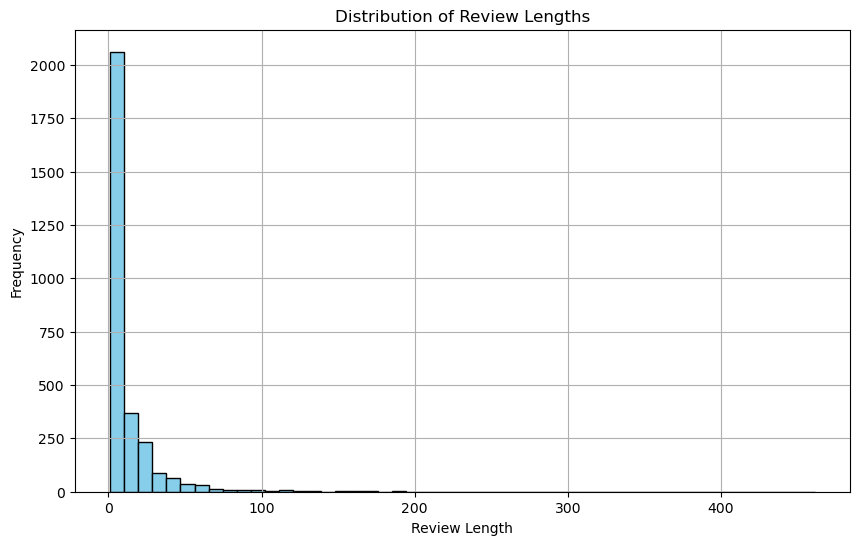

In [12]:
# Plot histogram of review lengths
plt.figure(figsize=(10, 6))
plt.hist(df_length, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### 1f.	Analyze lengths

In [13]:
# review lengths
print("Minimum review length:", df_length.min())
print("Maximum review length:", df_length.max())
print("Average review length:", df_length.mean())

Minimum review length: 1
Maximum review length: 461
Average review length: 12.818273769386378


In [14]:
# Find the mode of review lengths
mode_length = stats.mode(df_length)

print("Mode of review lengths:", mode_length.mode.item())
print("Frequency of the mode:", mode_length.count.item())


Mode of review lengths: 1
Frequency of the mode: 413


### 1g. Check for duplicates

In [15]:
duplicates_df = df[df.duplicated(subset=['reviewerID', 'asin', 'reviewTime', 'reviewText'], keep=False)]

# Count the number of duplicate rows based on specific columns
duplicate_count = duplicates_df.shape[0]

print("Number of duplicate rows considering reviewerID, asin, unixReviewTime and reviewText:", duplicate_count)



Number of duplicate rows considering reviewerID, asin, unixReviewTime and reviewText: 0


## 2.	Text basic pre-processing:

### 2a. Labeling the data based on ratings

In [16]:
# Labeling the data based on ratings
def label_rating(row):
    if row['overall'] >= 4:
        return 'positive'
    elif row['overall'] == 3:
        return 'neutral'
    else:  # Ratings 1 and 2
        return 'negative'

df['rating_label'] = df.apply(label_rating, axis=1)

### 2b. Chose the appropriate columns for your sentiment analyzer

In [17]:
# Dropping columns 'image', 'vote', and 'style' columns because are not important for the analysis
df.drop(columns=['image', 'vote', 'style'], inplace=True, errors='ignore')


# Dropping 'reviewTime' and 'overall' because 'reviewTime' and 'rating_label' will be used
df.drop(columns=['unixReviewTime', 'overall'], inplace=True)

# Chose the appropriate columns for your sentiment analyzer
df['reviewText'] = df['reviewText'].fillna('')
df['summary'] = df['summary'].fillna('')

# Combine 'reviewText' and 'summary' into a single column for a comprehensive sentiment analysis
df['combined_text'] = df['reviewText'] + " " + df['summary']

df.drop(columns=['reviewText', 'summary'], inplace=True, errors='ignore')

# Print the shape of the DataFrame to see the number of entries and columns
print("DataFrame shape:", df.shape)

df.head()

DataFrame shape: (2972, 7)


,verified,reviewTime,reviewerID,asin,reviewerName,rating_label,combined_text
0,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,john stoiber,positive,Another great gift. Five Stars
1,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,Amazon Customer,positive,Gift card for my daughter Ease of use
2,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,Kindle Customer,positive,Nice present Five Stars
3,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,Amante dei Gatti,positive,My niece loved this birthday greeting/gift car...
4,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,Joan Freesh,positive,fine as a gift. Five Stars


In [18]:
# Print a summary of any missing values in the combined_text column
print("\nMissing values in 'combined_text':", df['combined_text'].isnull().sum())



Missing values in 'combined_text': 0


### 2c.	Check for outliers

#### Unverified Reviewers outliers

In [19]:
def identify_unverified_reviewers(df):
    unverified_reviewers = df[df['verified'] == False]
    df = df.drop(unverified_reviewers.index)
    return len(unverified_reviewers)


unverified_reviewers_count = identify_unverified_reviewers(df)
print("Number of Unverified Reviewers:", unverified_reviewers_count)


Number of Unverified Reviewers: 134


In [20]:
# Delete unverified users reviews 
df = df[df['verified'] != False]
df.shape


(2838, 7)

#### Word count outliers

In [21]:
# Check for outliers in 'combined_text' by word count
df['word_count'] = df['combined_text'].fillna('').apply(lambda x: len(x.split()))
print(df['word_count'].describe())

count    2838.000000
mean       14.965116
std        24.641766
min         2.000000
25%         4.000000
50%         7.000000
75%        16.000000
max       474.000000
Name: word_count, dtype: float64


Outlier threshold (Z-Score Method): 88.89041347800963


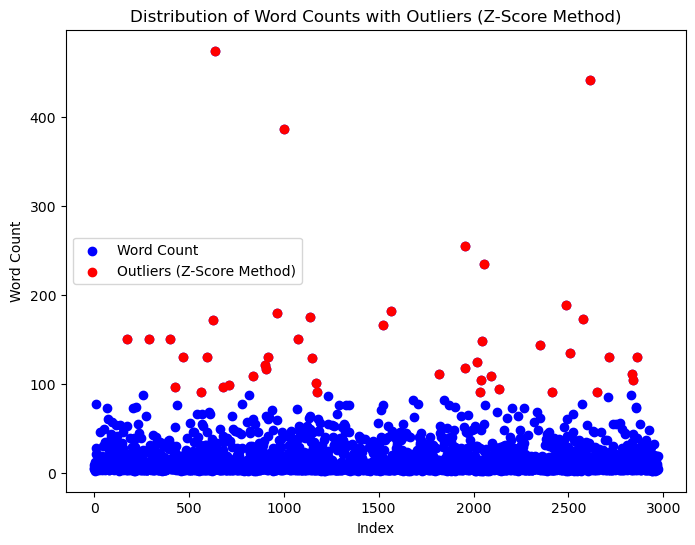

In [22]:
# Calculate z-scores
mean_length = df['word_count'].mean()
std_length = df['word_count'].std()

# Define threshold for outliers using z-scores
z_score_threshold = 3

# Print outlier threshold
outlier_threshold = mean_length + z_score_threshold * std_length
print("Outlier threshold (Z-Score Method):", outlier_threshold)

# Calculate z-scores for word count
wordcount_z_score = (df['word_count'] - mean_length) / std_length

# Identify outliers using z-scores
outliers_z_score = df['word_count'][(wordcount_z_score > z_score_threshold) | (wordcount_z_score < -z_score_threshold)]

# Create a scatter plot to visualize the distribution of review lengths and identify outliers using z-scores
plt.figure(figsize=(8, 6))
plt.scatter(df['word_count'].index, df['word_count'], c='blue', label='Word Count')
plt.scatter(outliers_z_score.index, outliers_z_score, c='red', label='Outliers (Z-Score Method)')
plt.xlabel('Index')
plt.ylabel('Word Count')
plt.title('Distribution of Word Counts with Outliers (Z-Score Method)')
plt.legend()
plt.show()

In [23]:
# Filter rows where word count is less than or equal to 89 to delete oouliers
df = df[df['word_count'] <= 89]

# Drop the 'word_count' column as it's no longer needed
df.drop(columns=['word_count'], inplace=True)

# Optionally, you can reset the index of the DataFrame after dropping rows
df.reset_index(drop=True, inplace=True)

df.shape

(2793, 7)

In [24]:
df.head()

,verified,reviewTime,reviewerID,asin,reviewerName,rating_label,combined_text
0,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,john stoiber,positive,Another great gift. Five Stars
1,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,Amazon Customer,positive,Gift card for my daughter Ease of use
2,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,Kindle Customer,positive,Nice present Five Stars
3,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,Amante dei Gatti,positive,My niece loved this birthday greeting/gift car...
4,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,Joan Freesh,positive,fine as a gift. Five Stars


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   verified       2793 non-null   bool  
 1   reviewTime     2793 non-null   object
 2   reviewerID     2793 non-null   object
 3   asin           2793 non-null   object
 4   reviewerName   2793 non-null   object
 5   rating_label   2793 non-null   object
 6   combined_text  2793 non-null   object
dtypes: bool(1), object(6)
memory usage: 133.8+ KB


#### Reviewers outliers

In [26]:
# Remove leading and trailing whitespaces and convert to lowercase
df['combined_text'] = df['combined_text'].str.strip().str.lower()

# Group by reviewerID and reviewText_cleaned (cleaned review text) and count the occurrences
review_frequency = df.groupby(['reviewerID', 'combined_text', 'reviewTime', 'rating_label']).size().reset_index(name='review_count')

# Sort the list by review count in descending order
review_frequency_sorted = review_frequency.sort_values(by='review_count', ascending=False)

# Print the sorted DataFrame
print(review_frequency_sorted.head())

# Calculate the mean review count
mean_review_count = review_frequency['review_count'].mean()
print("\nMean review count:", mean_review_count)

# Calculate the standard deviation of review counts
std_review_count = review_frequency['review_count'].std()

# Define a threshold for outliers (3 standard deviations from the mean)
threshold = 3

# Calculate the lower and upper bounds for outliers
lower_bound = mean_review_count - (threshold * std_review_count)
upper_bound = mean_review_count + (threshold * std_review_count)

# Identify outliers based on the bounds
outliers = review_frequency[(review_frequency['review_count'] < lower_bound) | (review_frequency['review_count'] > upper_bound)]

# Print the outliers
print("\nOutliers:")
print(outliers)

# Print the quantity of outliers
print("Quantity of outliers:", len(outliers))

# Store the initial number of rows
initial_rows = len(df)

# Remove duplicate reviews based on reviewerID, cleaned review text, reviewTime, and rating_label
df.drop_duplicates(subset=['reviewerID', 'combined_text', 'reviewTime', 'rating_label'], keep='first', inplace=True)

# Calculate the quantity of deleted rows
deleted_rows = initial_rows - len(df)

# Print the quantity of deleted rows
print("Quantity of deleted rows:", deleted_rows)


          reviewerID                                      combined_text  \
1453  A3OHGWD8LIDZ8K           fast delivery and card worked five stars   
1825   ALQUMN89FI5HD  great gift card worked perfectly. great gift card   
1812   AKT3Z3O3T26PL                                   great five stars   
1096  A32MAHV0PG6YU6         does what a gift card should :) five stars   
523   A1YWA3Z785KX03                    arrived within 5 min five stars   

       reviewTime rating_label  review_count  
1453  03 10, 2015     positive            21  
1825  11 27, 2017     positive            15  
1812  02 15, 2018     positive            13  
1096  12 14, 2017     positive            13  
523   03 10, 2017     positive            10  

Mean review count: 1.3691176470588236

Outliers:
          reviewerID                                      combined_text  \
3     A11F143J72N3QZ                                    gift five stars   
81    A15FGESGPI84VP                        its a gift card. five s

In [27]:
# Dropping'reviewerID','asin', 'reviewerName', since they are not directly related to sentiment analysis 
df.drop(columns=['reviewerID','asin', 'reviewerName' ], inplace=True, errors='ignore')


In [28]:
df.drop(['verified', 'reviewTime'], axis=1, inplace=True)
df.shape


(2040, 2)

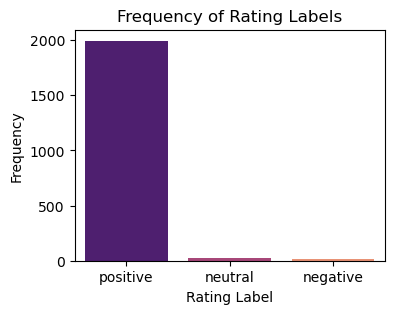

Shape of dataframe: (2040, 2)


In [29]:
# Count the frequency of each rating label
label_counts = df ['rating_label'].value_counts()

# Plot the frequency of each rating label using seaborn
plt.figure(figsize=(4, 3))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='magma')
plt.title('Frequency of Rating Labels')
plt.xlabel('Rating Label')
plt.ylabel('Frequency')

plt.show()
print("Shape of dataframe:", df.shape)

## 4. Pre-process the text for VADER

In [30]:
#  Perform Sentiment Analysis
# Ensure you have the VADER lexicon downloaded
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score for a text
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis on the combined review texts
df['sentiment_score'] = df['combined_text'].apply(get_sentiment_score)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\maric\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
df['rating_label'].value_counts()

rating_label
positive    1994
neutral       26
negative      20
Name: count, dtype: int64

In [32]:
df['sentiment_score'].describe()

count    2040.000000
mean        0.644155
std         0.321261
min        -0.894900
25%         0.475300
50%         0.726900
75%         0.880700
max         0.993100
Name: sentiment_score, dtype: float64

In [33]:
df['rating_label_vader'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 
                                                       else ('neutral' 
                                                             #if (x > -0.05 and x < 0.05) 
                                                             if(x == 0)
                                                             else 'negative'))


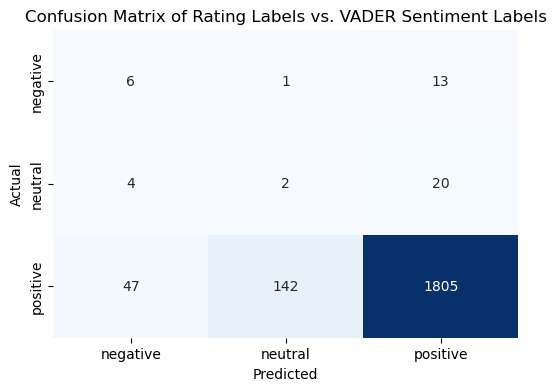

In [34]:
#Comparing the rating labels and the VADER sentiment labels
# Create a confusion matrix
conf_matrix = pd.crosstab(df['rating_label'], df['rating_label_vader'], rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Rating Labels vs. VADER Sentiment Labels')
plt.show()

In [35]:
#printing the accuracy of the VADER sentiment labels
# Calculate the accuracy of the VADER sentiment labels
accuracy = (conf_matrix['negative']['negative'] + conf_matrix['positive']['positive'] + conf_matrix['neutral']['neutral']) / conf_matrix.values.sum()
print("accuracy of vader lexicon:", accuracy)
from sklearn.metrics import f1_score
F1_score = f1_score(df['rating_label'], df['rating_label_vader'], average='weighted')
print("F1 score of vader lexicon:", F1_score)

accuracy of vader lexicon: 0.8887254901960784
F1 score of vader lexicon: 0.9226501377977138


In [36]:
#show the reviews that are misclassified
misclassified_reviews = df[df['rating_label'] != df['rating_label_vader']]

In [37]:
misclassified_reviews.count()

rating_label          227
combined_text         227
sentiment_score       227
rating_label_vader    227
dtype: int64

In [38]:
pd.set_option('display.max_colwidth', None)
misclassified_reviews[(misclassified_reviews['rating_label'] == 'positive') & (misclassified_reviews['rating_label_vader'] == 'negative')][['rating_label','rating_label_vader','combined_text']]


,rating_label,rating_label_vader,combined_text
39,positive,negative,"how can you go wrong with a amazon gift certificate, you can't terrific"
94,positive,negative,if you are ever stuck on what to get kids (tweens) this is the way to go!\nwho does not love gift cards? they are the same as cash and not as impersonal. that way they spend the money to get what they want and you know they cannot return to store to exchange. great gift idea
99,positive,negative,"once again, who but donald trump (perhaps the walton family) could hate an amazon gift card? who but donald trump (perhaps the walton family) could hate an amazon gift card"
168,positive,negative,"delivered as expected, no complaints! five stars"
283,positive,negative,what's not to like five stars
300,positive,negative,easy to use no problems
341,positive,negative,whats not to love about a gift card ??? five stars
484,positive,negative,what's not to love five stars
612,positive,negative,who won't love a gift? plus it was nicely packed with a good quality cardboard box. they are hard card boards and has magnetics to keep them shut. who won't love a gift?
641,positive,negative,"kinda funky. thought it would be prettier than it is. just tin, but it's what's inside that counts. right? never saw a snowflake like this."


In [39]:
misclassified_reviews[(misclassified_reviews['rating_label']=='positive') & (misclassified_reviews['rating_label_vader']=='negative')][['rating_label','rating_label_vader',]]

,rating_label,rating_label_vader
39,positive,negative
94,positive,negative
99,positive,negative
168,positive,negative
283,positive,negative
300,positive,negative
341,positive,negative
484,positive,negative
612,positive,negative
641,positive,negative


## 5. Selecting 1000 reviews from the dataset

In [40]:
#selecting 1000 reviews randomly
df_1000 = df.sample(n=1000, random_state=1)
df_1000.head()


,rating_label,combined_text,sentiment_score,rating_label_vader
2273,positive,beautifully done. will make great christmas gifts. i ordered early to ensure i had them. great gifts,0.9382,positive
1244,positive,very great place to eat five stars,0.6590,positive
1246,positive,gift great gift,0.8720,positive
2614,positive,purchased for my great niece - she loves it! fun container too! gift card with holder,0.9391,positive
1073,positive,this was a great gift and an awesome place to eat with friends or family. i will choose to give this gift card for special occasions and holidays again. it was well received by all. awesome gift !!!!,0.9857,positive


## 6.a Modeling (Sentiment Analysis) - VADER Lexicon Approach

In [41]:

# Load spaCy model for tokenization
nlp = spacy.load('en_core_web_sm')

# Define the list of stopwords and create the lemmatizer object
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text using spaCy
    doc = nlp(text)
    tokens = [token.text for token in doc]

    # Remove stopwords
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatize each word
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


df_1000['reviews_after_preprocessing'] = df_1000['combined_text'].apply(preprocess_text)
df_1000['reviews_after_preprocessing'].head()


2273                                                  beautifully done .   make great christmas gift .   ordered early ensure . great gift
1244                                                                                                             great place eat five star
1246                                                                                                                       gift great gift
2614                                                                     purchased great niece - love !   fun container ! gift card holder
1073    great gift awesome place eat friend family . choose give gift card special occasion holiday . well received . awesome gift ! ! ! !
Name: reviews_after_preprocessing, dtype: object

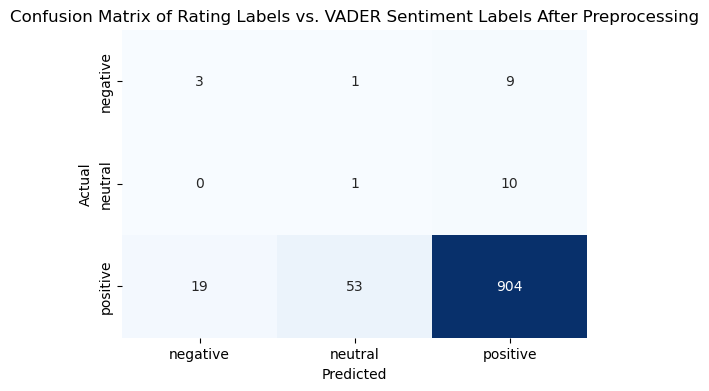

In [42]:
df_1000['vader_sentiment_score_after_preprocessing'] = df_1000['reviews_after_preprocessing'].apply(get_sentiment_score)
df_1000['rating_label_vader_after_preprocessing'] = df_1000['vader_sentiment_score_after_preprocessing'].apply(lambda x: 'positive' if x > 0
                                                                                                     else ('neutral' if x == 0
                                                                                                           else 'negative'))
confmatrix_after_preprocessing = pd.crosstab(df_1000['rating_label'], df_1000['rating_label_vader_after_preprocessing'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(6,4))
sns.heatmap(confmatrix_after_preprocessing, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Rating Labels vs. VADER Sentiment Labels After Preprocessing')
plt.show()

In [43]:
#printing the accuracy of the VADER sentiment labels after preprocessing
accuracy_after_preprocessing = (confmatrix_after_preprocessing['negative']['negative'] + confmatrix_after_preprocessing['positive']['positive'] + confmatrix_after_preprocessing['neutral']['neutral']) / confmatrix_after_preprocessing.values.sum()
print("accuracy of vader lexicon after preprocessing:", accuracy_after_preprocessing)
F1_score_after_preprocessing = f1_score(df_1000['rating_label'], df_1000['rating_label_vader_after_preprocessing'], average='weighted')
print("F1 score of vader lexicon after preprocessing:", F1_score_after_preprocessing)

accuracy of vader lexicon after preprocessing: 0.908
F1 score of vader lexicon after preprocessing: 0.9317920258782818


## 6.b Modeling (Sentiment Analysis) - Sentiwordnet Lexicon Approach

In [44]:
# Download necessary NLTK resources
nltk.download('sentiwordnet')
nltk.download('wordnet')

# Function to map PennTreebank tags to WordNet tags
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

# Function to get the SentiWordNet score for a sentence
def get_sentiwordnet_score(text):
    # Tokenize the text and tag the words
    tokens = nltk.word_tokenize(text)
    after_tagging = pos_tag(tokens)

    sentiment = 0.0

    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Iterate over the tagged words
    for word, tag in after_tagging:
        wn_tag = penn_to_wn(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            continue

        # Lemmatize the word
        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        if not lemma:
            continue

        # Get WordNet synsets for the lemmatized word
        synsets = wn.synsets(lemma, pos=wn_tag)
        if not synsets:
            continue

        # Take the first synset (the most common one)
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())

        # Add the positivity and negativity scores
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        
        """
        print("Token:", word)
        print("Tag:", tag)
        print("Lemma:", lemma)
        print("Synsets:", synsets)
        print("Sentiment:", swn_synset.pos_score() - swn_synset.neg_score())
        print()
        
    # Print text and total sentiment
    print("------------------------------------------")
    print("Texto:", text)
    print("Sentimiento:", sentiment)
    print()
    print("------------------------------------------")
    """
    return sentiment

df_1000['reviews_after_preprocessing'] = df_1000['combined_text'].apply(get_sentiwordnet_score)
df_1000['reviews_after_preprocessing'].head()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\maric\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maric\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


2273    0.875
1244    0.000
1246    0.500
2614    0.125
1073    2.750
Name: reviews_after_preprocessing, dtype: float64

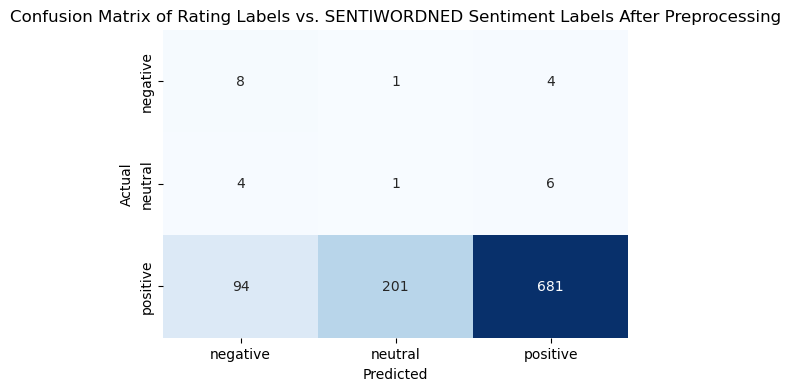

In [45]:
df_1000['rating_label_sentiwordnet_after_preprocessing'] = df_1000['reviews_after_preprocessing'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

confmatrix_after_preprocessing = pd.crosstab(df_1000['rating_label'], df_1000['rating_label_sentiwordnet_after_preprocessing'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(6,4))
sns.heatmap(confmatrix_after_preprocessing, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Rating Labels vs. SENTIWORDNED Sentiment Labels After Preprocessing')
plt.show()

In [46]:
# Determine misclassified reviews
misclassified_reviews = df_1000[df_1000['rating_label'] != df_1000['rating_label_sentiwordnet_after_preprocessing']]

for index, row in misclassified_reviews.iterrows():
    print("Text:", row['combined_text'])
    print("Actual Label:", row['rating_label'])
    print("Predicted Label:", row['rating_label_sentiwordnet_after_preprocessing'])
    print("=" * 50) 

Text: very great place to eat five stars
Actual Label: positive
Predicted Label: neutral
Text: great gift idea when you are not sure of the recipients tastes! son in law gift!
Actual Label: positive
Predicted Label: negative
Text: great five stars
Actual Label: positive
Predicted Label: neutral
Text: wish there was an email delivery option. three stars
Actual Label: neutral
Predicted Label: positive
Text: it was for my, son in law...he of course loved it was really difficult to buy for he has everything...... lowe's -e-mail delivery
Actual Label: positive
Predicted Label: negative
Text: discounted panda express? yes please! bought this on a lightning deal, so it was a few bucks off. mmmmm orange chicken...
Actual Label: positive
Predicted Label: negative
Text: meh don't get it one star
Actual Label: negative
Predicted Label: neutral
Text: this was purchased for a relative by request. five stars
Actual Label: positive
Predicted Label: negative
Text: yummy five stars
Actual Label: positi

In [47]:
#printing the accuracy of the sentiwordnet sentiment labels after preprocessing 
accuracy_after_preprocessing = (confmatrix_after_preprocessing['negative']['negative'] + confmatrix_after_preprocessing['positive']['positive'] + confmatrix_after_preprocessing['neutral']['neutral']) / confmatrix_after_preprocessing.values.sum()
print("accuracy of sentiwordnet lexicon after preprocessing:", accuracy_after_preprocessing)
F1_score_after_preprocessing = f1_score(df_1000['rating_label'], df_1000['rating_label_sentiwordnet_after_preprocessing'], average='weighted')
print("F1 score of sentiwordnet lexicon after preprocessing:", F1_score_after_preprocessing)

accuracy of sentiwordnet lexicon after preprocessing: 0.69
F1 score of sentiwordnet lexicon after preprocessing: 0.7992784173550901


In [48]:
# Testing the models with some texts
print ("TESTING")
test_texts = [
    "This product is amazing!",
    "It is not bad",
    "I hate this product, it's terrible",
    " xxxx", 
    "This product is great!",
    "so so",
    "This product is not bad, but it could be better"
]

# Test VADER model
print("VADER Model:")
for text in test_texts:
    score = sia.polarity_scores(text)['compound']
    if score > 0:
        print(f"Positive: {text}")
    elif score < 0:
        print(f"Negative: {text}")
    else:
        print(f"Neutral: {text}")

# Test SentiWordNet model
print("\nSentiWordNet Model:")
for text in test_texts:
    score = get_sentiwordnet_score(text)
    if score > 0:
        print(f"Positive: {text}")
    elif score < 0:
        print(f"Negative: {text}")
    else:
        print(f"Neutral: {text}")


TESTING
VADER Model:
Positive: This product is amazing!
Positive: It is not bad
Negative: I hate this product, it's terrible
Neutral:  xxxx
Positive: This product is great!
Neutral: so so
Positive: This product is not bad, but it could be better

SentiWordNet Model:
Positive: This product is amazing!
Negative: It is not bad
Negative: I hate this product, it's terrible
Neutral:  xxxx
Neutral: This product is great!
Neutral: so so
Negative: This product is not bad, but it could be better
